# Relatório de Modelagem e Simulação - Grupo Enzo

**Membros**:
- Ísis Ardisson Logullo
- João Pedro Lukasavicus Silva
- Leonardo Martinez Ikeda
- Matheus Conceição
- Vitor Barbosa Sério

## Introdução

### Bloco em rampa

**Forças atuantes**

Como o carrinho utilizado é leve, podemos dizer que a massa do corpo do carrinho, junto com o celular, possui massa muito maior que suas rodas. Portanto, podemos aproximar esse problema para um caso de bloco deslizando sem atrito. Porém, ainda existe a força de resistência do ar atuando.

$\overrightarrow{F}_r(t) = \overrightarrow{F}_g + \overrightarrow{F}_N + \overrightarrow{F}_d(v(t))$

onde $v(t)$ é a velocidade do objeto no instante $t$, $F_r$ é a força resultante, $F_g$ é força gravitacional, $F_N$ é a força normal, $F_d$ é a força de resistência do ar e $\theta$ é o ângulo de inclinação da rampa.

Sabemos que

$F_g = mg$

onde $m$ é a massa do objeto e $g$ é a aceleração da gravidade ($\approx \text{9,8m/s}^2$).

Além disso,

$\overrightarrow{F}_N = - \overrightarrow{F}_{g,x}$ e $\overrightarrow{F}_d \propto - \overrightarrow{F}_{g,y}$

onde $\overrightarrow{F}_{g,x}$ e $\overrightarrow{F}_{g,y}$ são as componentes perpendicular e paralela ao plano da rampa de $F_g$, respectivamente. Ou seja,

$F_{g,x} = F_g \text{cos}(\theta)$ e $F_{g,y} = F_g \text{sen}(\theta)$

então,

$F_r(t) = F_g \text{sen}(\theta) - F_d(v(t))$

Como o ar possui viscosidade muito baixa e a velocidade do objeto é, em média, alta (em comparação com a viscosidade do ar), temos que

$F_d(v(t)) \approx C v^2(t)$

onde $C$ é um coeficiente que pode ser calculado por

$C = \text{0,2} \rho_{ar} A$

com $\rho_{ar}$ sendo a densidade do ar ($\approx \text{1,2kg/m}^3$) e $A$, a área frontal do objeto.

Logo,

$F_r(t) = mg\text{sen}(\theta) - C v^2(t) \Rightarrow a(t) = \cfrac{dv}{dt} = g\text{sen}(\theta) - \cfrac{C v^2(t)}{m}$

Com isso, podemos perceber que esse caso é semelhante a um de queda livre com resistência do ar, mas em que $g$ vale $g\text{sen}(\theta)$. Portanto,

$v(t) = \sqrt{\cfrac{2 m g\text{sen}(\theta)}{C}}\text{tgh}\left(\cfrac{g\text{sen}(\theta)C}{2 m}t\right)$

**Parâmetros iniciais**

$m$, $g$, $\rho_{ar}$, $A$ e $\theta$ são constantes

$v(0) = 0\text{m/s}$

$a(0) = g \text{sen}(\theta)$

__*Precisamos medir:*__

$m$, $C$, $\theta$, $A$ e $a(t)$

### Pêndulo

**Forças atuantes**

$\overrightarrow{F}_r(t) = \overrightarrow{F}_g + \overrightarrow{F}_T(t) + \overrightarrow{F}_d(v(t))$

onde $F_r$ é a força resultante, $F_g$ é a força gravitacional, $F_T$ é a tensão na corda, $F_d$ é a resistência do ar e $v(t)$ é a velocidade linear do objeto no instante $t$.

Para simplificar os cálculos, vamos considerar apenas as componentes que alteram a magnitude da velocidade do objeto, que são as compoentes tangentes à tragetória do mesmo (os outros componentes alterama direção). Então, podemos simplificar a expressão acima como

$F^*_r(t) = F_g \text{sen}(\theta(t)) - F_d(v(t))$

Novamente, podemos dizer que $F_d(v(t)) \approx C v^2(t)$, então,

$F^*_r(t) = m g \text{sen}(\theta(t)) - C v^2(t)$

Como a tragetória é um arco de raio $L$ (o comprimento da corda), podemos dizer que

$v(t) = \omega(t) L = \cfrac{d\theta}{dt} L$ e $a(t) = \alpha(t) L = \cfrac{d^2\theta}{dt^2} L$

onde $\omega(t)$ e $\alpha(t)$ são a velocidade e aceleração angulares do objeto no instante $t$, respectivamente.

Portanto,

$a(t) = g \text{sen}(\theta(t)) - \cfrac{C v^2(t)}{m}$

$\alpha(t) = \cfrac{g \text{sen}(\theta(t))}{L} - \cfrac{C L \omega^2(t)}{m}$

$\cfrac{d^2 \theta}{dt^2} = \cfrac{g}{L} \text{sen}(\theta(t)) - \cfrac{C L}{m} \left(\cfrac{d\theta}{dt}\right)^2$

**Parâmetros iniciais**

$m$, $g$, $\rho_{ar}$, $A$ e $L$ são constantes

$\theta(0) = \theta_0$

$\omega(0) = 0\text{rad/s}$

$\alpha(0) = \cfrac{g\text{sen}(\theta_0)}{L}$

__*Precisamos medir:*__

$m$, $C$, $L$, $\alpha$(t), $\omega(t)$ e $\theta_0$

### Movimento Circular Uniforme

**Forças atuantes**

$F_r = F_c = m \omega^2 R$

onde $F_r$ é a força resultante, $F_c$ é a força centrípeta, $m$ é a massa do objeto, $\omega$ é a velocidade angular do objeto e $R$ é o raio da trajetória.

**Utilizando variáveis polares**

$\theta(t) = \theta_0 + \omega t$

$\theta(t) = \theta_0 + \cfrac{d \theta}{dt} t$

**Utilizando variáveis lineares**

$v = \omega R = \cfrac{d\theta}{dt}R$

$x(t) = R \text{cos}(\theta(t))$

$y(t) = R \text{sen}(\theta(t))$

$v_x(t) = \cfrac{dx}{dt} = - \cfrac{d\theta}{dt} R \text{sen}(\theta(t)) = - \omega R \text{sen}(\theta(t)) = - v \text{sen}(\theta(t))$

$v_y(t) = \cfrac{dy}{dt} = \cfrac{d\theta}{dt} R \text{cos}(\theta(t)) = \omega R \text{cos}(\theta(t)) = v \text{cos}(\theta(t))$

**Parâmetros iniciais**

$m$, $R$ e $\omega$ são constantes

$\theta(0) = \theta_0$

$x(0) = R$

$y(0) = 0\text{m}$

$v_x(0) = 0\text{m/s}$

$v_y(0) = \omega R$

__*Precisamos medir:*__

$m$, $R$, $\omega$ e $\theta_0$

Abaixo um link para o vídeo do experimento realizado.

INSERIR LINK AQUI

Agora, para iniciar o programa, vamos primeiro importar as bibliotecas que serão utilizadas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import math

## Método


## Dados


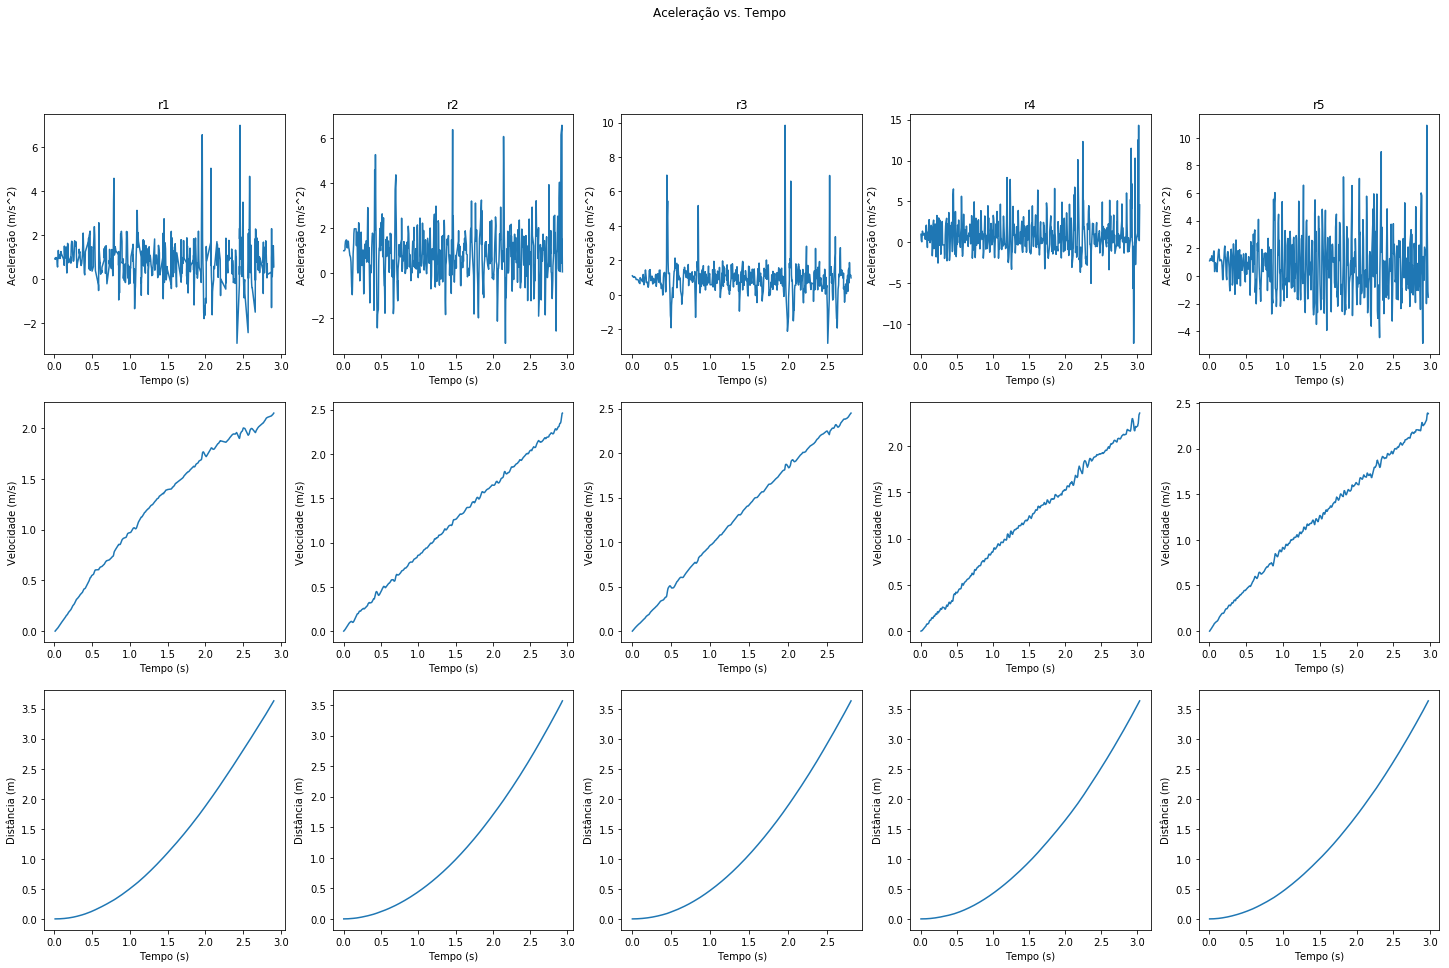

/home/vitor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars
/home/vitor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


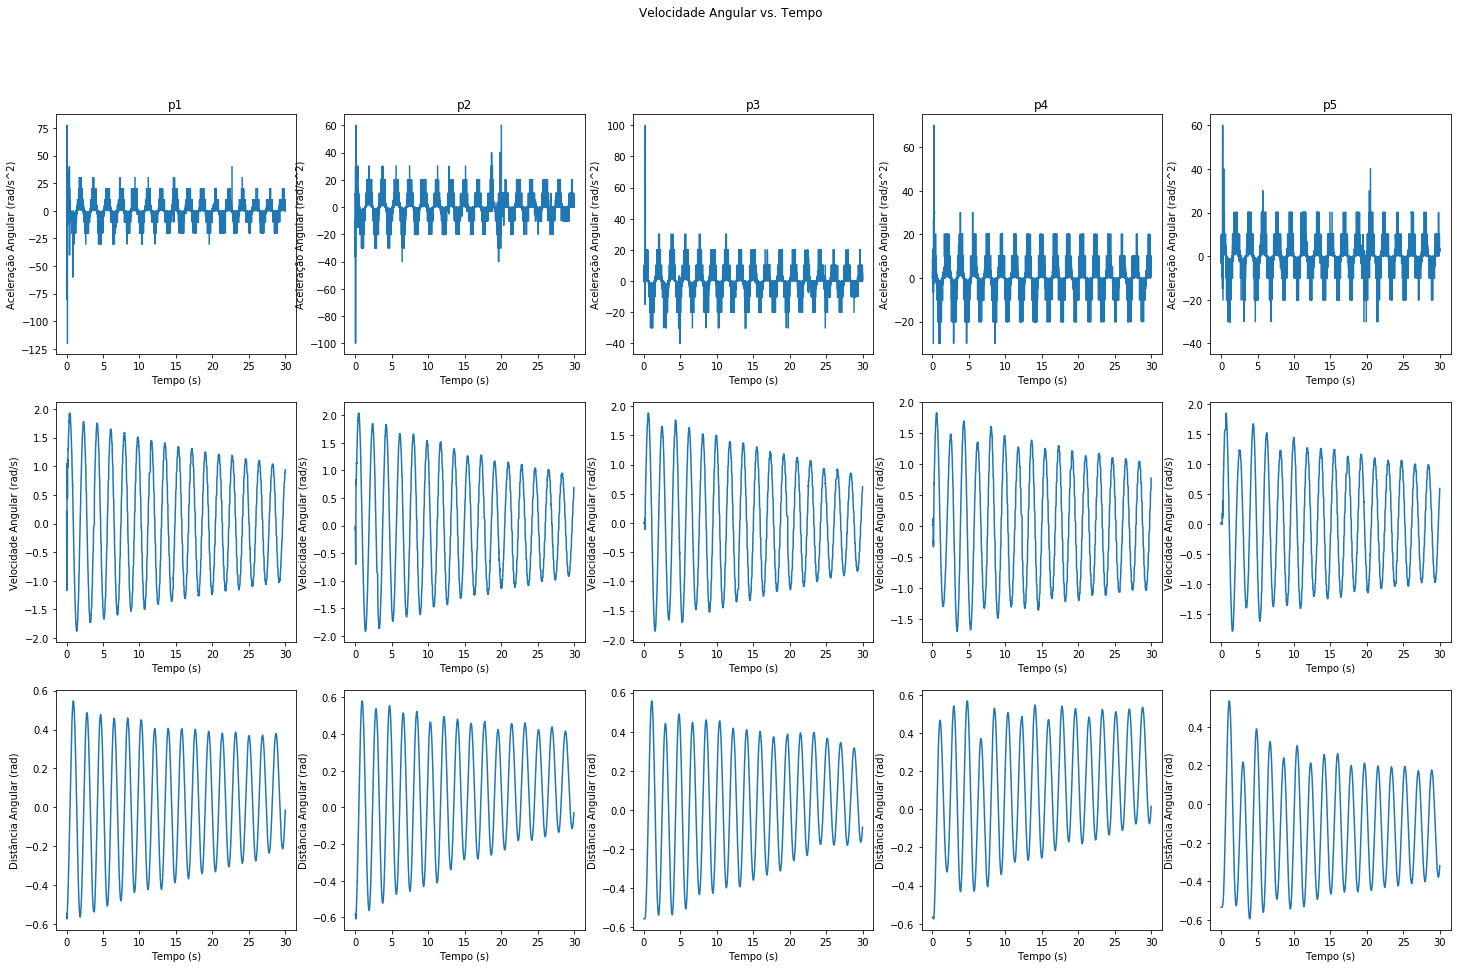

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import math

##################################
#           FUNCOES              #
##################################

    
def integrate(x, y, y0 = 0):
    yi = [y0]
    
    for i in range(1, min(len(x), len(y))):
        dy = ((y[i-1] + y[i]) / 2) * (x[i] - x[i-1])
        yi.append(yi[i-1] + dy)
        
    return yi

def derivate(x, y, y0 = 0):
    yi = [y0]
    
    for i in range(1, min(len(x), len(y))):
        dy = y[i] - y[i-1]
        dx = x[i] - x[i-1]
        yi.append(dy / dx)
        
    return yi

##################################
#            DADOS               #
##################################
#
#
## 00000 = dados faltando
## 'CHUTE' = valores que esquecemos (Vitor, principalmente) de coletar, então estão estimados e podem precisar de ajustes
#
#
## A plotagem dos gráficos não é definitiva e está aí mais pra visualizarmos e fazermos testes

## Constantes

g = 9.8                 # aceleração da gravidade (m/s^2)
par = 1.2               # densidade do ar         (kg/m^3)

## Bloco em rampa
tr = 6 * math.pi / 180  # inclinacao              (rad)
D = 3.64                # distância percorrida    (m)
mr = 0.34               # massa do bloco          (g)
Ar = 0.008              # área frontal do bloco   (m^2)
r = []
tmin_r = [4.7, 2.9, 6.2, 4.6, 4.5]

plt.figure(figsize = (25, 15), facecolor = '#FFFFFF')
plt.suptitle('Aceleração vs. Tempo')
for i in range(5):
    r.append(pd.read_csv('r' + str(i+1) + '.csv'))          # lendo dados do acelerometro
    r[i] = r[i].filter(items=['time', 'gFx'])               # removendo variáveis que não serão utilizadas
    r[i] = r[i].loc[r[i]['time'] >= tmin_r[i]]              # removendo dados antes do tempo inicial estimado
    r[i] = r[i].reset_index()
    r[i].update(pd.Series(r[i]['gFx'] * g, name = 'gFx'))   # convertendo valores para m/s^2
    r[i].update(pd.Series(r[i]['time'] - tmin_r[i], name = 'time')) # 'zerando' o tempo
    r[i]['v'] = integrate(r[i]['time'], r[i]['gFx'])        # calculando as velocidades experimentais
    r[i]['d'] = integrate(r[i]['time'], r[i]['v'])          # calculando o deslocamento experimental
    r[i] = r[i].loc[r[i]['d'] <= D]                         # filtrando dados com deslocamento maior que o tamanho total da rampa
    
    
    plt.subplot(3, 5, i+1)
    plt.plot(r[i]['time'], r[i]['gFx'])
    #plt.plot([tmin_r[i], tmin_r[i]], [min(r[i]['gFx']), max(r[i]['gFx'])], color = 'C1')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Aceleração (m/s^2)')
    plt.title('r' + str(i+1))
    
    plt.subplot(3, 5, i+6)
    plt.plot(r[i]['time'], r[i]['v'])
    plt.xlabel('Tempo (s)')
    plt.ylabel('Velocidade (m/s)')
    
    plt.subplot(3, 5, i+11)
    plt.plot(r[i]['time'], r[i]['d'])
    plt.xlabel('Tempo (s)')
    plt.ylabel('Distância (m)')
plt.show()
    

## MCU
R = 2.1                 # raio (m)
t = pd.read_csv('mcu.csv')

## Pendulo
l = 0.65                # comprimento das cordas                     (m) - CHUTE!!
a = 0.051               # largura do cesto                           (m)
b = 0.144               # comprimento do cesto                       (m)
L = 0.6                 # comprimento da corda imaginária do pêndulo (m)
mp = 0.2                # massa do pendulo                           (kg) - CHUTE!!
Ap = 00000              # área frontal do pêndulo                    (m^2)
p = []
tmin_p = [7.05, 5.15, 5.2, 5.15, 5.3]
theta0 = []             # inclinação inicial


plt.figure(figsize = (25, 15), facecolor = '#FFFFFF')
plt.suptitle('Velocidade Angular vs. Tempo')
for i in range(5):
    p.append(pd.read_csv('p' + str(i+1) + '.csv'))                                  # lendo dados do acelerometro
    p[i] = p[i].filter(items=['time', 'wx'])                                        # removendo variáveis que não serão utilizadas
    p[i] = p[i].loc[(p[i]['time'] >= tmin_p[i]) & (p[i]['time'] <= tmin_p[i] + 30)] # removendo dados fora do intervalo alvo
    p[i] = p[i].reset_index()
    p[i].update(pd.Series(p[i]['time'] - tmin_p[i], name = 'time'))                 # 'zerando' o tempo
    p[i]['theta'] = integrate(p[i]['time'], p[i]['wx'])                             # calculando a inclinação experimental
    theta0.append(max(p[i]['theta']) / 2)                                           # estimando a inclinação inicial
    p[i].update(pd.Series(integrate(p[i]['time'], p[i]['wx'], y0 = -theta0[i]), name = 'theta')) # recalculando a inclinação experimental
    p[i]['a'] = derivate(p[i]['time'], p[i]['wx'], y0 = g * math.sin(theta0[i]) / L) # calculando a aceleração angular
    
    plt.subplot(3, 5, i+1)
    plt.plot(p[i]['time'], p[i]['a'])
    plt.xlabel('Tempo (s)')
    plt.ylabel('Aceleração Angular (rad/s^2)')
    plt.title('p' + str(i+1))
    
    plt.subplot(3, 5, i+6)
    plt.plot(p[i]['time'], p[i]['wx'])
    #plt.plot([tmin_p[i], tmin_p[i]], [min(p[i]['wx']), max(p[i]['wx'])], color = 'C1')
    #plt.plot([tmax_p[i], tmax_p[i]], [min(p[i]['wx']), max(p[i]['wx'])], color = 'C1')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Velocidade Angular (rad/s)')
    
    plt.subplot(3, 5, i+11)
    plt.plot(p[i]['time'], p[i]['theta'])
    plt.xlabel('Tempo (s)')
    plt.ylabel('Distância Angular (rad)')
plt.show()



## Interpretação



## Crítica



## Registro

- Realização do experimento
- Anotação dos dados
- Gravação do vídeo
- Edição do video e upload no youtube
- Criação do código de plotagem e analise dos dados e dos erros
- Criação dos gráficos
- Estruturação e redação do relatório